# Home 3: Build a CNN for image recognition.

### Name: [Syed Zain Raza]


## 0. You will do the following:

1. Read, complete, and run my code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
4. Upload this .HTML file to your Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM3/cnn.html


## 1. Data preparation

### 1.1. Load data


In [1]:
from sklearn.preprocessing import OneHotEncoder 

In [2]:
from keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#print (x_train[1])

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

Using TensorFlow backend.


shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


In [3]:
print (x_train.shape[1:])

(32, 32, 3)


### Preprocessing

In [4]:
mean = np.mean(x_train,axis=(0,1,2,3))

std = np.std(x_train,axis=(0,1,2,3))

x_train = (x_train-mean)/(std+1e-7)

x_test = (x_test-mean)/(std+1e-7)

### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [5]:
def to_one_hot(y, num_class=10):
    a = OneHotEncoder(n_values = num_class)
    b = a.fit_transform(y).toarray()
    return b

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [6]:
rand_indices = np.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential
from keras import regularizers

# For regularization
w_decay = 1e-4

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_decay), input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(w_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(w_decay)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(w_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(w_decay)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(w_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [8]:
# data augmentation

#from keras.preprocessing.image import ImageDataGenerator

#dg = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

#dg.fit(x_tr)

In [9]:
from keras import optimizers

#learning_rate = 0.0008 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001,decay=1e-6),
              metrics=['acc'])

In [10]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=20, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 70s 2ms/step - loss: 1.5450 - acc: 0.4748 - val_loss: 1.2926 - val_acc: 0.5770ac
Epoch 2/20
40000/40000 [==============================] - 21s 525us/step - loss: 1.1120 - acc: 0.6407 - val_loss: 0.9409 - val_acc: 0.7057
Epoch 3/20
40000/40000 [==============================] - 21s 533us/step - loss: 0.9898 - acc: 0.6939 - val_loss: 0.9223 - val_acc: 0.7183
Epoch 4/20
40000/40000 [==============================] - 21s 533us/step - loss: 0.9252 - acc: 0.7230 - val_loss: 0.8717 - val_acc: 0.7475
Epoch 5/20
40000/40000 [==============================] - 22s 539us/step - loss: 0.8899 - acc: 0.7412 - val_loss: 0.8462 - val_acc: 0.7605
Epoch 6/20
40000/40000 [==============================] - 22s 545us/step - loss: 0.8477 - acc: 0.7598 - val_loss: 0.8648 - val_acc: 0.7579
Epoch 7/20
40000/40000 [==============================] - 22s 539us/step - loss: 0.8186 - acc: 0.7725 - val_loss: 0.

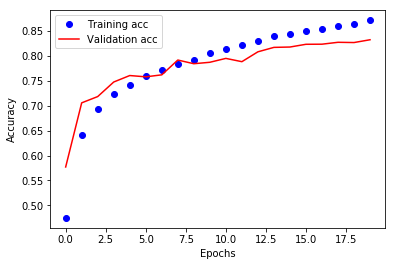

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001,decay=1e-6),
              metrics=['acc'])

In [13]:
#Train your model on the entire training set (50K samples)>
#Use (x_train, y_train_vec) instead of (x_tr, y_tr)>
#Do NOT use the validation_data option (because now you do not have validation data)>

#dg.fit(x_train)

history = model.fit(x_train, y_train_vec, batch_size=32, epochs=20)

Epoch 1/20
50000/50000 [==============================] - 27s 535us/step - loss: 0.6468 - acc: 0.8492
Epoch 2/20
50000/50000 [==============================] - 26s 529us/step - loss: 0.6243 - acc: 0.8581
Epoch 3/20
50000/50000 [==============================] - 25s 494us/step - loss: 0.6125 - acc: 0.8609
Epoch 4/20
50000/50000 [==============================] - 25s 492us/step - loss: 0.5995 - acc: 0.8649
Epoch 5/20
50000/50000 [==============================] - 25s 491us/step - loss: 0.5885 - acc: 0.8690
Epoch 6/20
50000/50000 [==============================] - 25s 493us/step - loss: 0.5816 - acc: 0.87110s - loss: 0.5818 - acc:
Epoch 7/20
50000/50000 [==============================] - 25s 495us/step - loss: 0.5751 - acc: 0.8742
Epoch 8/20
50000/50000 [==============================] - 25s 491us/step - loss: 0.5722 - acc: 0.8757
Epoch 9/20
50000/50000 [==============================] - 25s 498us/step - loss: 0.5654 - acc: 0.87898s - loss: 0.5556 - acc: 0.8 - ETA: 8s - lo - ETA: 4s - los

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [14]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 3s 338us/step
loss = 0.7075126354217529
accuracy = 0.8518
